In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.optimize import curve_fit
plt.style.use('ggplot')
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = 'lmodern'
%matplotlib inline

In [3]:
df = pd.read_csv('aufg_a.csv')
print(df)
print(df.columns)

     x     "y_0"
0  0.5  0.132939
1  1.5  0.204351
2  2.5  0.197394
3  3.5  0.157457
4  4.5  0.139232
5  5.5  0.060324
6  6.5  0.056360
7  7.5  0.051944
Index(['x', ' "y_0"'], dtype='object')


Aufgabenteil a) least squares ohne Regularisierung

In [4]:
def func(x,a0,a1,a2,a3,a4,a5,a6):
    return a0*x**6 + a1*x**5 + a2*x**4 + a3*x**3 + a4*x**2 + a5*x +a6

In [5]:
params , cov = curve_fit(func,df['x'],df[' "y_0"'],method='lm')
print(params)

[ -1.96287489e-04   4.78566325e-03  -4.52006131e-02   2.10565785e-01
  -5.13746564e-01   6.09607408e-01  -6.74448343e-02]


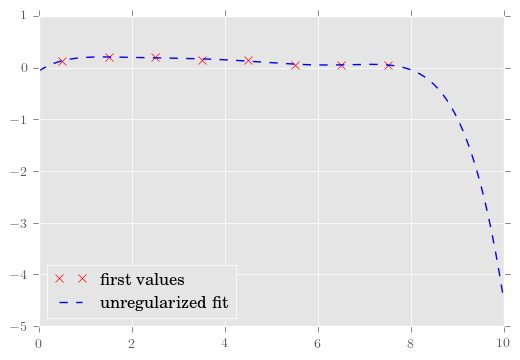

In [18]:
xx=np.linspace(0,10,1000)
plt.plot(df['x'],df[' "y_0"'],'rx',label='first values')
plt.plot(xx,func(xx,*params),'b--',label='unregularized fit')
plt.legend(loc='lower left')

Aufgabenteil b) least squares mit Regularisierung

In [46]:
X = df['x'].values
y = df[' "y_0"'].values
alphas = [0.1,0.3,0.7,3,10]
xx = np.linspace(0,10,1000)

In [23]:
from sklearn.linear_model import Ridge

[ 0.1971764   0.17655461  0.15593282  0.13531102  0.11468923  0.09406743
  0.07344564  0.05282385]
[  3.36443285e-13  -6.74569733e-12   4.82357802e-11  -1.44975283e-10
   1.61190902e-10  -2.06217934e-02   2.07487298e-01]
[  3.36443285e-13  -6.74569733e-12   4.82357802e-11  -1.44975283e-10
   1.61190902e-10  -2.06217934e-02   2.07487298e-01]
[ 0.19683514  0.17631085  0.15578656  0.13526227  0.11473798  0.09421369
  0.0736894   0.05316511]
[ -2.20881667e-14   2.12308537e-13   1.34243132e-12  -1.54738125e-11
   2.01224394e-11  -2.05242907e-02   2.07097288e-01]
[ -2.20881667e-14   2.12308537e-13   1.34243132e-12  -1.54738125e-11
   2.01224394e-11  -2.05242907e-02   2.07097288e-01]
[ 0.19616222  0.17583019  0.15549816  0.13516614  0.11483411  0.09450209
  0.07417006  0.05383803]
[  9.00856273e-15   9.46119260e-13  -8.01769138e-12   1.42240003e-12
  -7.19825561e-11  -2.03320250e-02   2.06328227e-01]
[  9.00856273e-15   9.46119260e-13  -8.01769138e-12   1.42240003e-12
  -7.19825561e-11  -2.03

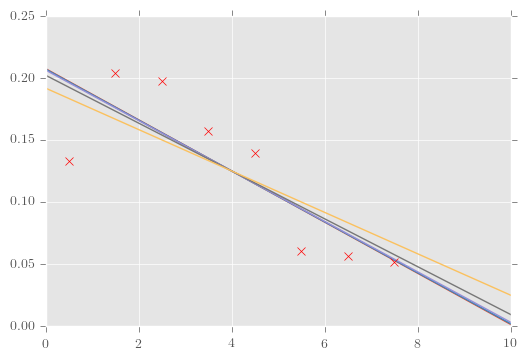

In [52]:
for alpha in alphas:
    clf = Ridge(alpha)
    fit = clf.fit(X.reshape(-1,1),y)
    path = clf.score(X.reshape(-1,1),y)
    y_pred = clf.predict(X.reshape(-1,1))
    print(y_pred)
    popt , cov = curve_fit(func ,X ,y_pred)
    print(popt)
    plt.plot(xx,func(xx,*popt))
    print(popt)
plt.plot(X,y,'rx')
plt.show()

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.scatter(X, y)
    ax.plot(xx, est.predict(xx[:, np.newaxis]), color='red', label=label)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower left')  #, fontsize='small')


[  0.00000000e+00   3.98408576e-02   2.37780622e-02  -1.60774510e-02
   2.45036420e-03  -1.00768394e-04  -1.57905362e-06]
[  0.00000000e+00   2.29969149e-02   1.77004081e-02  -5.56852913e-03
  -1.16203148e-03   3.90150061e-04  -2.51701597e-05]
[  0.00000000e+00   1.37608196e-02   1.31475191e-02   7.69817556e-04
  -3.22846727e-03   6.62187334e-04  -3.79484648e-05]
[  0.00000000e+00   5.84671455e-03   8.15234448e-03   4.95334977e-03
  -4.17870714e-03   7.47236291e-04  -4.04580699e-05]
[  0.00000000e+00   2.95787192e-03   4.96839389e-03   4.06305987e-03
  -3.06483047e-03   5.20224266e-04  -2.68041849e-05]


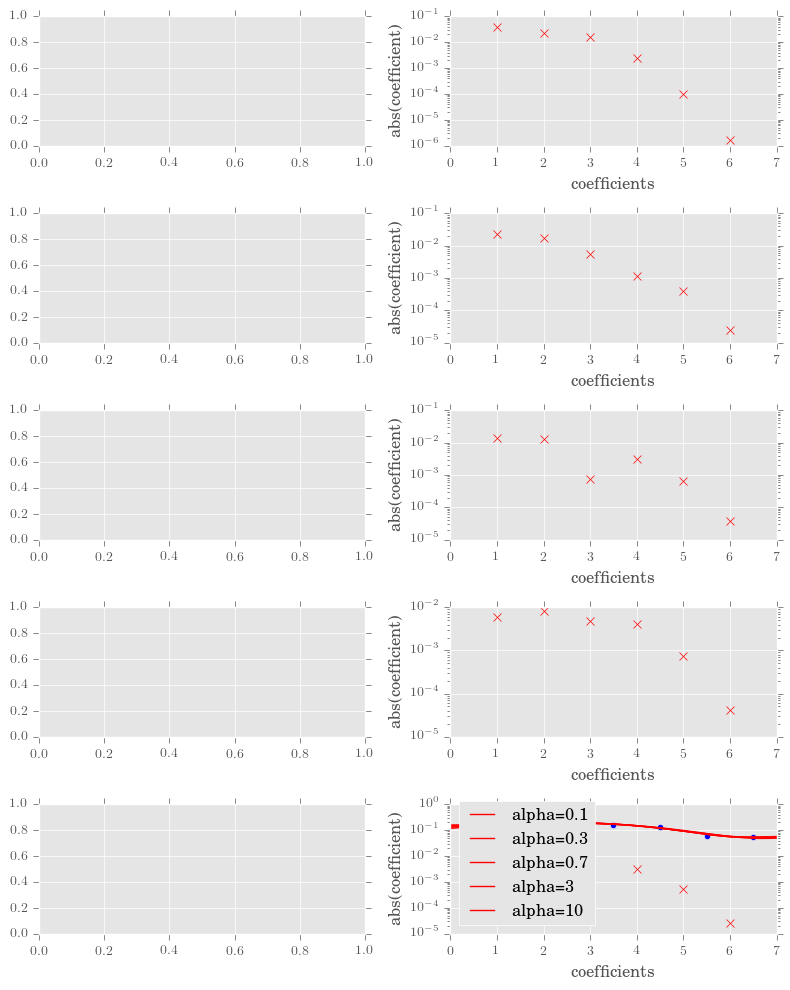

In [104]:
fig, ax_rows = plt.subplots(5, 2, figsize=(8, 10))
coeffs = pd.DataFrame()
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    print(coef)
    if yscale == 'log':
        ax.semilogy(np.abs(coef), 'rx', label=label)
    else:
        ax.plot(np.abs(coef),'rx', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((0, 7))

degree = 6
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    est.fit(X.reshape(-1,1), y)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

plt.tight_layout()